In [182]:
from sympy import *

# general form of OA

In [54]:
H,Hs = symbols('H_\sigma H^*_\sigma',complex=True)
theta,t,alpha,n,omega,eta,K = symbols('theta t alpha n omega eta_\sigma K')
a = Function('a')('t')
a_s = Function('a^*')('t')

n_ = 20  # 원하는 함수 개수
a_n = [Function(f'a_{i}')(t) for i in range(1, n_+1)]
as_n = [Function(f'a^*_{i}')(t) for i in range(1, n_+1)]

A = 0
As = 0
for n in range(1,8,2):
    A += eta*Function(f'a_{n}')(t) * E**(n*I*theta)
    As += eta*Function(f'a^*_{n}')(t) * E**(-n*I*theta)    
    n += 1
    A += Function(f'a_{n}')(t) * E**(n*I*theta)
    As += Function(f'a^*_{n}')(t) * E**(-n*I*theta)

f = 1/(2*pi) * (1+(A+As))
v = omega + 1/(2*I) * (H*E**(-I*(2*theta+alpha))-Hs*E**(I*(2*theta+alpha)))

# OA Ansatz

In [183]:
H,Hs = symbols('H_\sigma H^*_\sigma',complex=True)
theta,t,alpha,n,omega,eta,K = symbols('theta t alpha n omega eta_\sigma K')
a = Function('a_\sigma')('t')
a_s = Function('a^*_\sigma')('t')
b = Function('b_\sigma')('t')
b_s = Function('b^*_\sigma')('t')

A = 0
As = 0
for n in range(1,60,2):
    A += eta*b**n* E**(n*I*theta)
    As += eta*b_s**n * E**(-n*I*theta)    
    n += 1
    A += a**n* E**(n*I*theta)
    As += a_s**n * E**(-n*I*theta)

f = 1/(2*pi) * (1+(A+As))
v = omega + 1/(2*I) * (H*E**(-I*(2*theta+alpha))-Hs*E**(I*(2*theta+alpha)))

In [184]:
F = 1/(2*pi) *( 1 + a**2 * E**(I*2*theta)/(1- a**2 * E**(I*2*theta)))

In [212]:
FN = 1/(pi) * (1-a**2 * cos(2*theta)+eta*a*(1-a**2)*cos(theta)) / (1-2*a**2*cos(2*theta)+a**4) - 1/(2*pi)

In [213]:
simplify(FN)

(-2*eta_\sigma*(a_\sigma(t)**2 - 1)*a_\sigma(t)*cos(theta) - a_\sigma(t)**4 + 1)/(2*pi*(a_\sigma(t)**4 - 2*a_\sigma(t)**2*cos(2*theta) + 1))

In [80]:
C = together(f.diff(t)+(f*v).diff(theta)).expand()

In [81]:
col_ = collect(C,E**(1j*theta))

In [82]:
print_latex(E**(I*theta))

e^{i \theta}


In [119]:
col_ = collect(C,E**(1j*theta))
col_

coeff_even = []
coeff_odd = []
for i in range(1, 50,2):
    coeff_odd.append(C.coeff(E**(i*I*theta)))
    i +=1
    coeff_even.append(C.coeff(E**(i *I*theta)))

In [120]:
AAA = (coeff_even[0].collect(pi)*pi.collect(a)/a).simplify()

In [131]:
BBB = ((coeff_odd[1].collect(pi)*2*pi/3).collect(b)/b**3/eta).simplify()

In [132]:
BBB

-H^*_\sigma*exp(I*alpha)/(2*b_\sigma(t)**2) + H_\sigma*b_\sigma(t)**2*exp(-I*alpha)/2 + I*omega + Derivative(b_\sigma(t), t)/b_\sigma(t)

In [133]:
coeff_evens = [(coeff_even[i].collect([pi,a])/AAA).simplify() for i in range(25)]

In [134]:
coeff_odds = [(coeff_odd[i].collect([pi,a])/BBB).simplify() for i in range(25)]

In [149]:
C.coeff(E**(2*I*theta))

-H^*_\sigma*exp(I*alpha)/(2*pi) + H_\sigma*a_\sigma(t)**4*exp(-I*alpha)/(2*pi) + I*omega*a_\sigma(t)**2/pi + a_\sigma(t)*Derivative(a_\sigma(t), t)/pi

In [136]:
BBB

-H^*_\sigma*exp(I*alpha)/(2*b_\sigma(t)**2) + H_\sigma*b_\sigma(t)**2*exp(-I*alpha)/2 + I*omega + Derivative(b_\sigma(t), t)/b_\sigma(t)

In [145]:
coeff_evens[2]

3*a_\sigma(t)**5/pi

In [142]:
coeff_odds[4]

9*eta_\sigma*b_\sigma(t)**9/(2*pi)

$F_{odd} = \eta_\sigma\left(\sum_{n=2}^{\infty}\frac{(2n-1)\cdot a_\sigma^{2n-1}}{2\pi}\ \right)\left({\dot{a}}_\sigma+i\omega a_\sigma+\frac{1}{2}\left(H_\sigma e^{-i\alpha}a_\sigma^3-H_\sigma^\ast e^{i\alpha}a_\sigma^{-1}\right)\right)$

In [139]:
coeff_odd[0]

-H^*_\sigma*eta_\sigma*b^*_\sigma(t)*exp(I*alpha)/(4*pi) + H_\sigma*eta_\sigma*b_\sigma(t)**3*exp(-I*alpha)/(4*pi) + I*eta_\sigma*omega*b_\sigma(t)/(2*pi) + eta_\sigma*Derivative(b_\sigma(t), t)/(2*pi)

In [ ]:
H,Hs = symbols('H H^*',complex=True)
theta,t,n = symbols('theta t n')
alpha,beta,omega,eta = symbols('alpha beta omega eta',real=True)
a = Function('a')('t')
a_s = Function('a^*')('t')
B = Sum((b*E**(2*I*theta))**n,(n,1,6)).doit()
Bs = Sum((b_s*E**(-2*I*theta))**n,(n,1,6)).doit()
f = 1/(2*pi) * (1+(B+Bs))
v = omega + 1/(2*I) * (H*E**(-I*(2*theta+alpha))-Hs*E**(I*(2*theta+alpha)))

# Initial condition $f_\sigma$

In [214]:
import numpy as np
import matplotlib.pyplot as plt
def dist_ab(x, a, b, eta):
    a_ = a*np.exp(1j*x)/(1-a*np.exp(1j*x))
    b_ = b*np.exp(1j*x)/(1-b*np.exp(1j*x))
    f1 = 1/(2*np.pi) * (1+ (a_+a_.conjugate()))
    f2 = 1/(2*np.pi) * (1+ (b_+b_.conjugate()))
    f = (1+eta)/2 *f1+ (1-eta)/2 *f2
    return np.real(f)


def dist_a(x, a, eta):
    f = 1/(np.pi) * (1-a**2 * np.cos(2*x)+eta*a*(1-a**2)*np.cos(x)) / (1-2*a**2*np.cos(2*x)+a**4) - 1/(2*np.pi)
    return f

In [245]:
x = np.linspace(-np.pi/2, 3*np.pi/2, 10000)
xs_ = np.linspace(-np.pi/2, 3*np.pi/2, 5)
A2 = np.sqrt(0.6)
a2 =  A2*np.exp(0*1j)
b2 =  a2* np.exp(np.pi*1j)

In [246]:
xs_

array([-1.57079633,  0.        ,  1.57079633,  3.14159265,  4.71238898])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


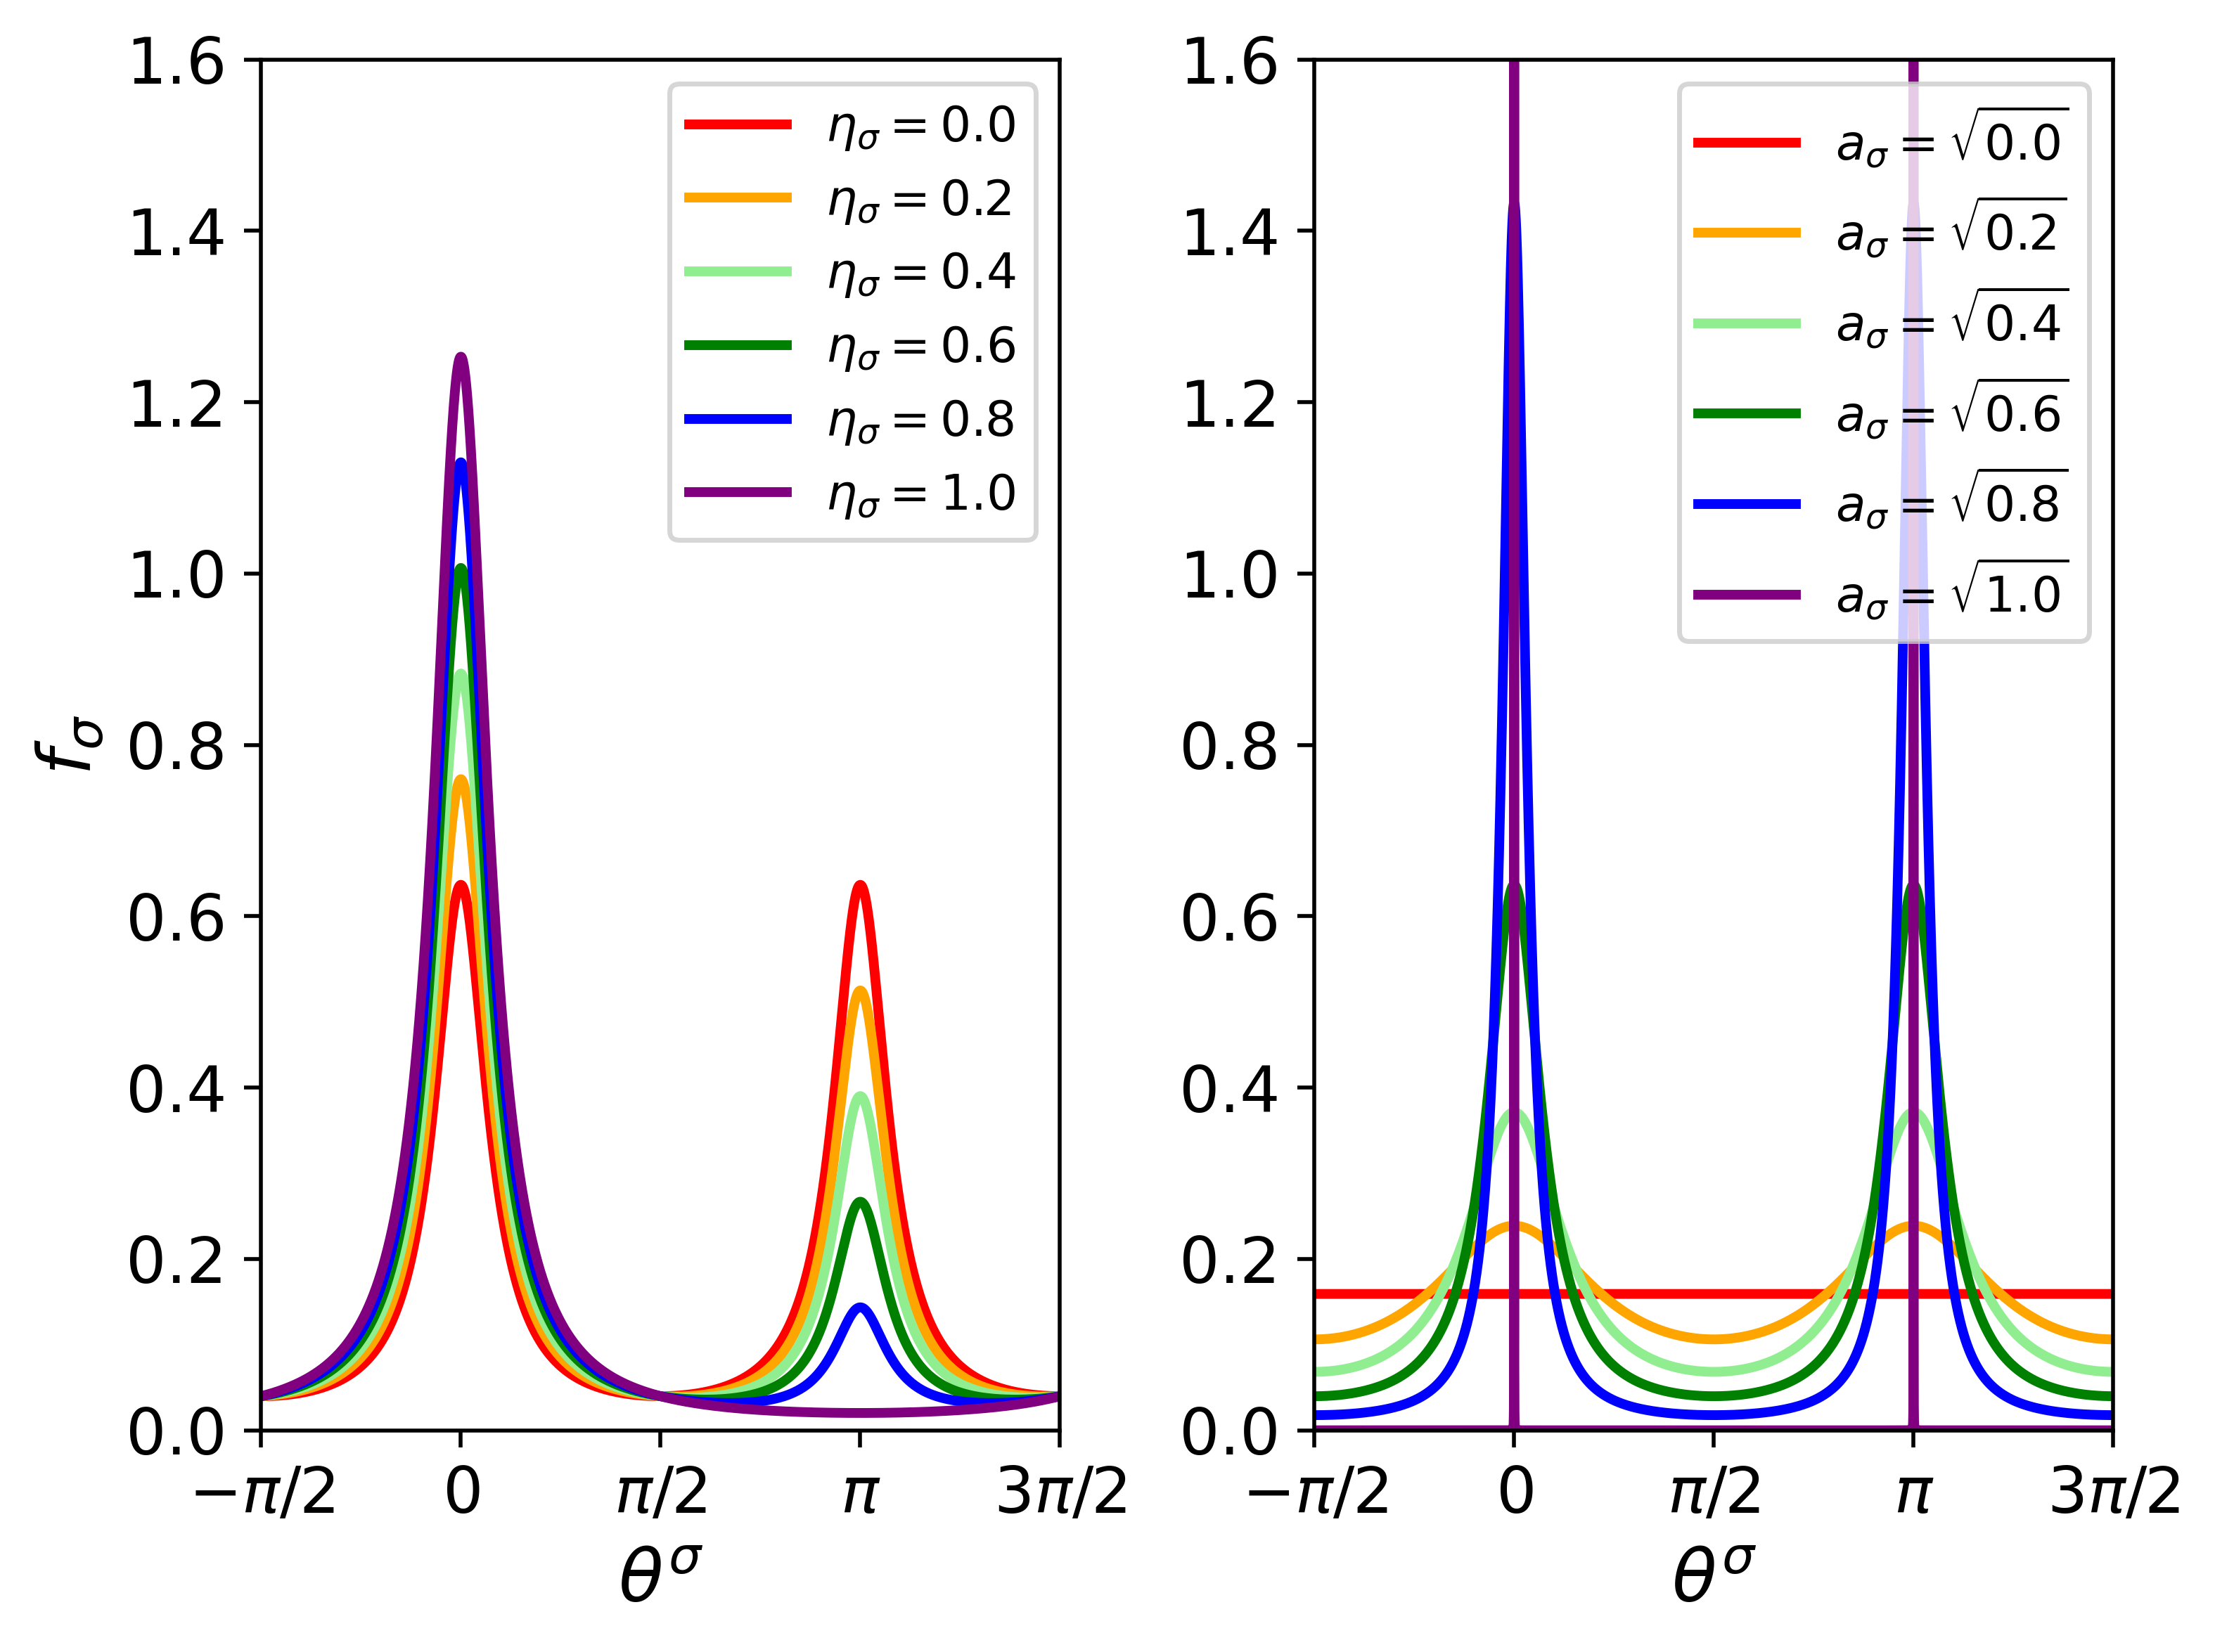

In [261]:
# f = dist_ab(x,a2,b2,eta=0.1)
# f2 = dist_a(x,a2,eta=0.1)
# plt.plot(x,f)
plt.figure(dpi=500)
ax  = plt.subplot(121)
color = ['red','orange','lightgreen','green','blue','purple']
for i in range(6):
    plt.plot(x,dist_a(x,a2,eta=0.2*i),color = color[i],lw=2,label=rf'$\eta_\sigma = {0.2*i:.01f}$')
plt.xlim(-np.pi/2,3*np.pi/2)
plt.legend()
plt.ylim(0,)
plt.yticks(fontsize=13)
plt.xticks([*xs_],[r'$-\pi/2$',r'$0$',r'$\pi/2$',r'$\pi$',r'$3\pi/2$'],fontsize=13)
plt.ylabel(r'$f_\sigma$',fontsize=15)
plt.xlabel(r'$\theta^\sigma$',fontsize=15)

plt.subplot(122)
color = ['red','orange','lightgreen','green','blue','purple']
for i in range(6):
    A2 = np.sqrt(0.2*i)
    a2 =  A2*np.exp(0*1j)
    plt.plot(x, dist_a(x, a2-1e-6, eta=0), color=color[i], lw=2, label=rf'$a_\sigma = \sqrt{{{0.2*i:.01f}}}$')
    A2 = np.sqrt(0.6)
    a2 =  A2*np.exp(0*1j)
plt.xlim(-np.pi/2,3*np.pi/2)
plt.legend()
plt.gca().sharey(ax)

plt.ylim(0,1.6)
plt.yticks(fontsize=13)
plt.xticks([*xs_],[r'$-\pi/2$',r'$0$',r'$\pi/2$',r'$\pi$',r'$3\pi/2$'],fontsize=13)
# plt.ylabel(r'$f_\sigma$',fontsize=15)
plt.xlabel(r'$\theta^\sigma$',fontsize=15)
plt.tight_layout()

In [171]:
np.sum(np.abs(f2)*(x[1]-x[0])),np.sum(np.abs(f)*(x[1]-x[0]))

(2.1250531303128533, 1.000025002500166)

In [262]:
from Simul import gen_dist

In [290]:
A2 = np.sqrt(0.6)
a2 =  A2*np.exp(0*1j)
b2 =  a2* np.exp(np.pi*1j)
X = gen_dist(N=5000,a=a2,b=b2,eta=0)
a3 =  1-1e-6
b3 =  -1 - 1e-6
Y = gen_dist(N=5000,a=a3,b=b3,eta=0.2)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 0, '$\\theta^2$')

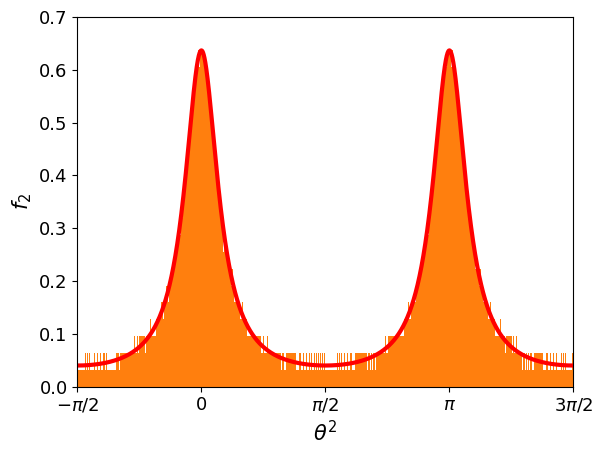

In [295]:
plt.hist(X,bins=1000,density=True,color='tab:orange');
plt.plot(x,dist_a(x,a2,eta=0),color = 'red',lw=3,label=rf'$\eta_\sigma = {0:.01f}$')

# plt.hist(Y,bins=50,density=True,color='tab:blue');
# plt.plot(x,dist_a(x,a3,eta=0),color = 'blue',lw=3,label=rf'$\eta_\sigma = {0:.01f}$')

plt.ylim(0,0.7)
plt.xlim(-np.pi/2,3*np.pi/2)
plt.yticks(fontsize=13)
plt.xticks([*xs_],[r'$-\pi/2$',r'$0$',r'$\pi/2$',r'$\pi$',r'$3\pi/2$'],fontsize=13)
plt.ylabel(r'$f_2$',fontsize=15)
plt.xlabel(r'$\theta^2$',fontsize=15)